# Import libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

# Importing dataset

In [85]:
start_df = pd.read_csv('mortgage.csv', low_memory=False)
print(start_df['status_time'].value_counts())
start_df = start_df.drop(['payoff_time','status_time'], axis = 1)
df = start_df.copy(deep=True)
df = df.groupby('id').last().reset_index()
df.head()
# df['id'].value_counts(sort=True)

0    580742
2     26589
1     15158
Name: status_time, dtype: int64


,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time
0,1,48,-7,25,113,29087.21,26.658065,9.200,146.45,2.715903,...,0,0,1,0,45000.0,715,69.4,9.200,87.03,1
1,2,26,18,25,138,105654.77,65.469851,7.680,225.10,2.151365,...,0,0,1,0,107200.0,558,80.0,7.680,186.91,0
2,3,29,-6,25,114,44378.60,31.459735,11.375,217.37,1.692969,...,0,0,1,0,48600.0,680,83.6,8.750,89.58,0
3,4,60,-2,25,119,52686.35,34.898842,10.500,189.82,2.836358,...,0,0,1,0,63750.0,587,81.8,10.500,97.99,0
4,5,27,18,25,138,52100.71,66.346343,9.155,222.39,2.361722,...,0,0,1,0,52800.0,527,80.0,9.155,186.91,0


# Exploratory data Analysis

# 1-D analysis 

Text(0, 0.5, 'Data type')

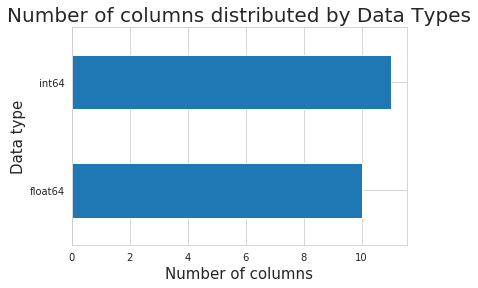

In [19]:
df.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

In [20]:
df.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

id                     50000
time                      60
orig_time                 98
first_time                50
mat_time                 200
REtype_CO_orig_time        2
REtype_PU_orig_time        2
REtype_SF_orig_time        2
investor_orig_time         2
FICO_orig_time           397
default_time               2
dtype: int64

In [21]:
df.select_dtypes('float64').apply(pd.Series.nunique, axis = 0)

balance_time               46363
LTV_time                   46323
interest_rate_time          2742
hpi_time                      60
gdp_time                      60
uer_time                      36
balance_orig_time          10691
LTV_orig_time                552
Interest_Rate_orig_time     1704
hpi_orig_time                 97
dtype: int64

In [74]:
corr = df.corr()['default_time'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', corr.tail(5))
print('\nMost Negative Correlations:\n', corr.head(5))

Most Positive Correlations:
 orig_time        0.209908
hpi_orig_time    0.250758
uer_time         0.335995
LTV_time         0.462710
default_time     1.000000
Name: default_time, dtype: float64

Most Negative Correlations:
 gdp_time         -0.391010
hpi_time         -0.341630
FICO_orig_time   -0.111601
time             -0.022113
id               -0.007827
Name: default_time, dtype: float64


# 2-D Analysis

In [50]:
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
startyr = 2009
for i in range(60):
    if i%12==0:
        startyr+=1
    df['time'].replace(i+1,str(startyr), inplace=True) 
    
# df['date']=df['time']
df.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time
0,1,2013,-7,25,113,29087.21,26.658065,9.200,146.45,2.715903,...,0,0,1,0,45000.0,715,69.4,9.200,87.03,1
1,2,2012,18,25,138,105654.77,65.469851,7.680,225.10,2.151365,...,0,0,1,0,107200.0,558,80.0,7.680,186.91,0
2,3,2012,-6,25,114,44378.60,31.459735,11.375,217.37,1.692969,...,0,0,1,0,48600.0,680,83.6,8.750,89.58,0
3,4,2014,-2,25,119,52686.35,34.898842,10.500,189.82,2.836358,...,0,0,1,0,63750.0,587,81.8,10.500,97.99,0
4,5,2012,18,25,138,52100.71,66.346343,9.155,222.39,2.361722,...,0,0,1,0,52800.0,527,80.0,9.155,186.91,0


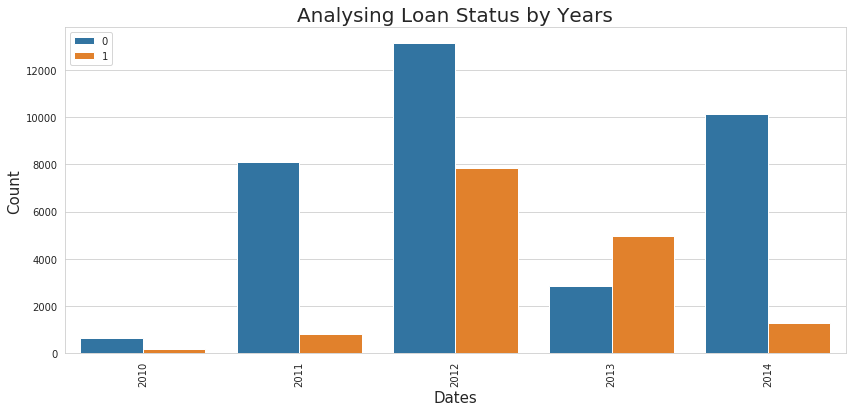

In [51]:
plt.figure(figsize = (14,6))
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g = sns.countplot(x='time', data=df,
                  hue='default_time')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc='upper left')
g.set_title("Analysing Loan Status by Years", fontsize=20)
plt.show()

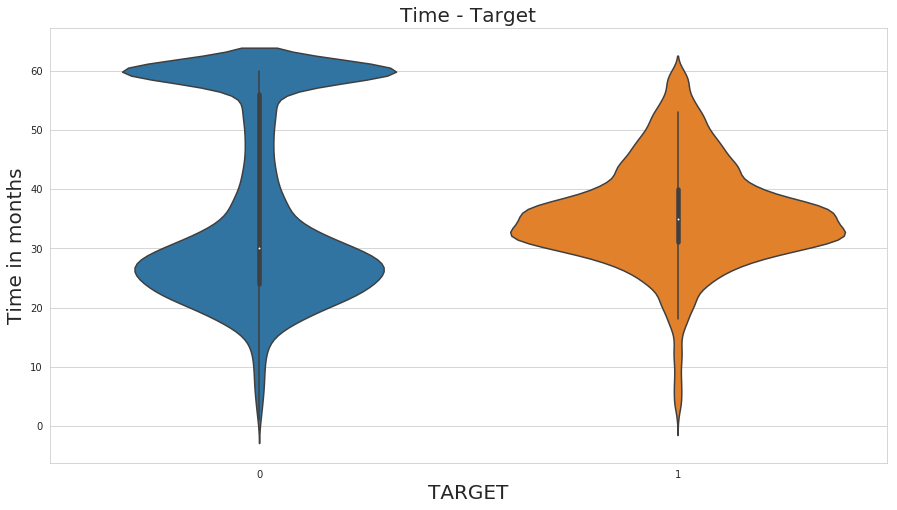

In [11]:
fig = plt.figure(figsize=(15,8))
sns.violinplot(x="default_time",y="time",data=df)
plt.title("Time - Target", fontsize=20)
plt.xlabel("TARGET", fontsize=20)
plt.ylabel("Time in months", fontsize=20);

Text(0.5, 1.0, 'Distribution of Interest Rate')

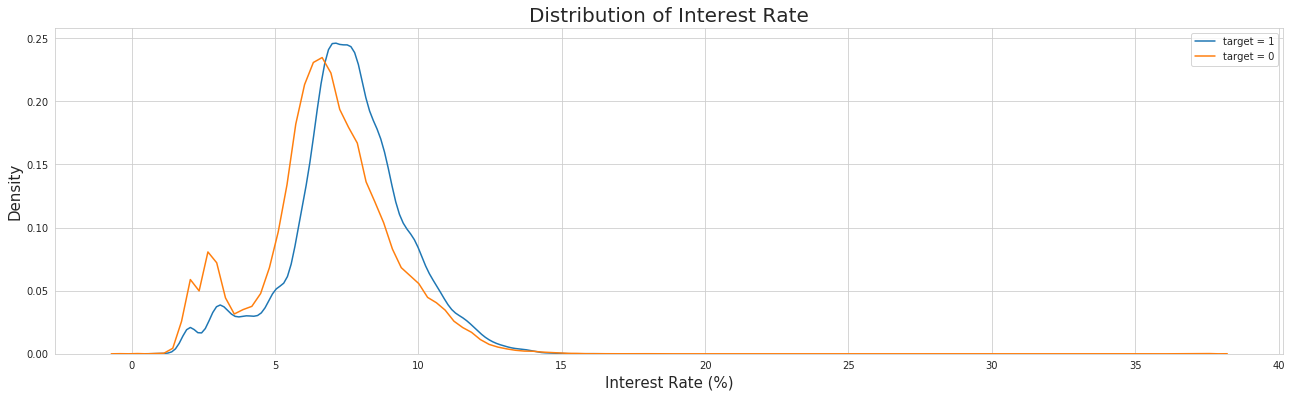

In [12]:
fig = plt.figure(figsize=(22,6))
sns.kdeplot(df.loc[df['default_time'] == 1, 'interest_rate_time'], label = 'target = 1')
sns.kdeplot(df.loc[df['default_time'] == 0, 'interest_rate_time'], label = 'target = 0');
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Interest Rate',fontsize=20)

Text(0.5, 1.0, 'Distribution of FICO Score')

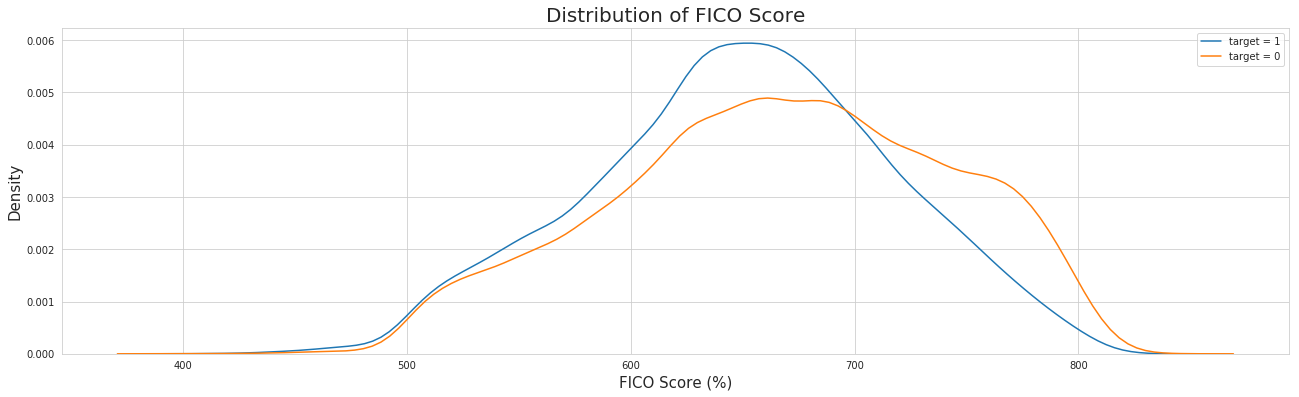

In [13]:
fig = plt.figure(figsize=(22,6))
sns.kdeplot(df.loc[df['default_time'] == 1, 'FICO_orig_time'], label = 'target = 1')
sns.kdeplot(df.loc[df['default_time'] == 0, 'FICO_orig_time'], label = 'target = 0');
plt.xlabel('FICO Score (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of FICO Score',fontsize=20)

Text(0.5, 1.0, 'Distribution of Unemployment rate ')

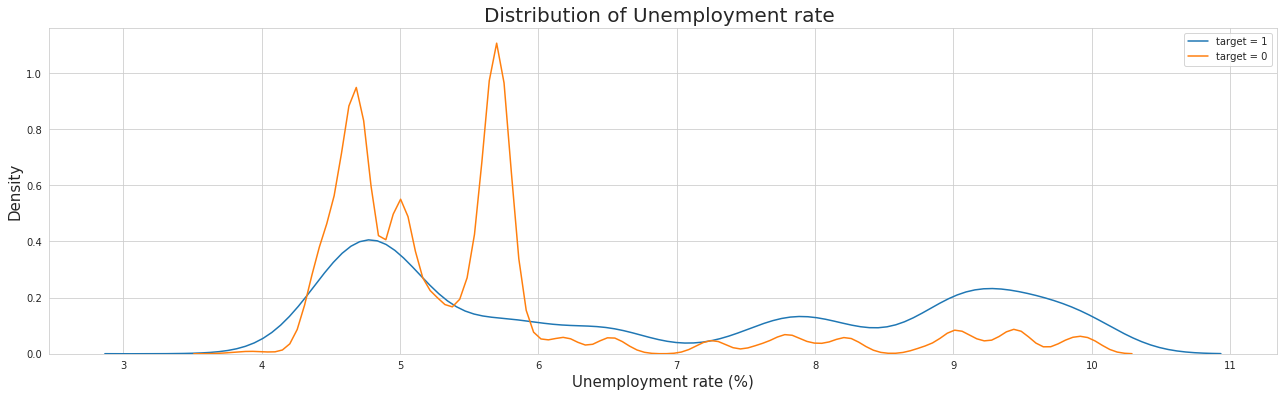

In [14]:
fig = plt.figure(figsize=(22,6))
sns.kdeplot(df.loc[df['default_time'] == 1, 'uer_time'], label = 'target = 1')
sns.kdeplot(df.loc[df['default_time'] == 0, 'uer_time'], label = 'target = 0');
plt.xlabel('Unemployment rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Unemployment rate ',fontsize=20)

# Data pre-processing

# Handling Missing Values

In [15]:
def null_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    return mis_val_table_ren_columns

In [75]:
miss_values = null_values(df)
miss_values.head(20)

Dataframe has 21 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
LTV_time,18,0.0


In [17]:
df['LTV_time'] = df['LTV_time'].fillna(df['LTV_time'].mean())

In [18]:
miss_values = null_values(df)
miss_values.head(20)

Dataframe has 21 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# Preparing X and Y

In [76]:
Y=df['default_time']
X=df.loc[:, df.columns != 'default_time']
#Y.head()


# Cheking for correlation 

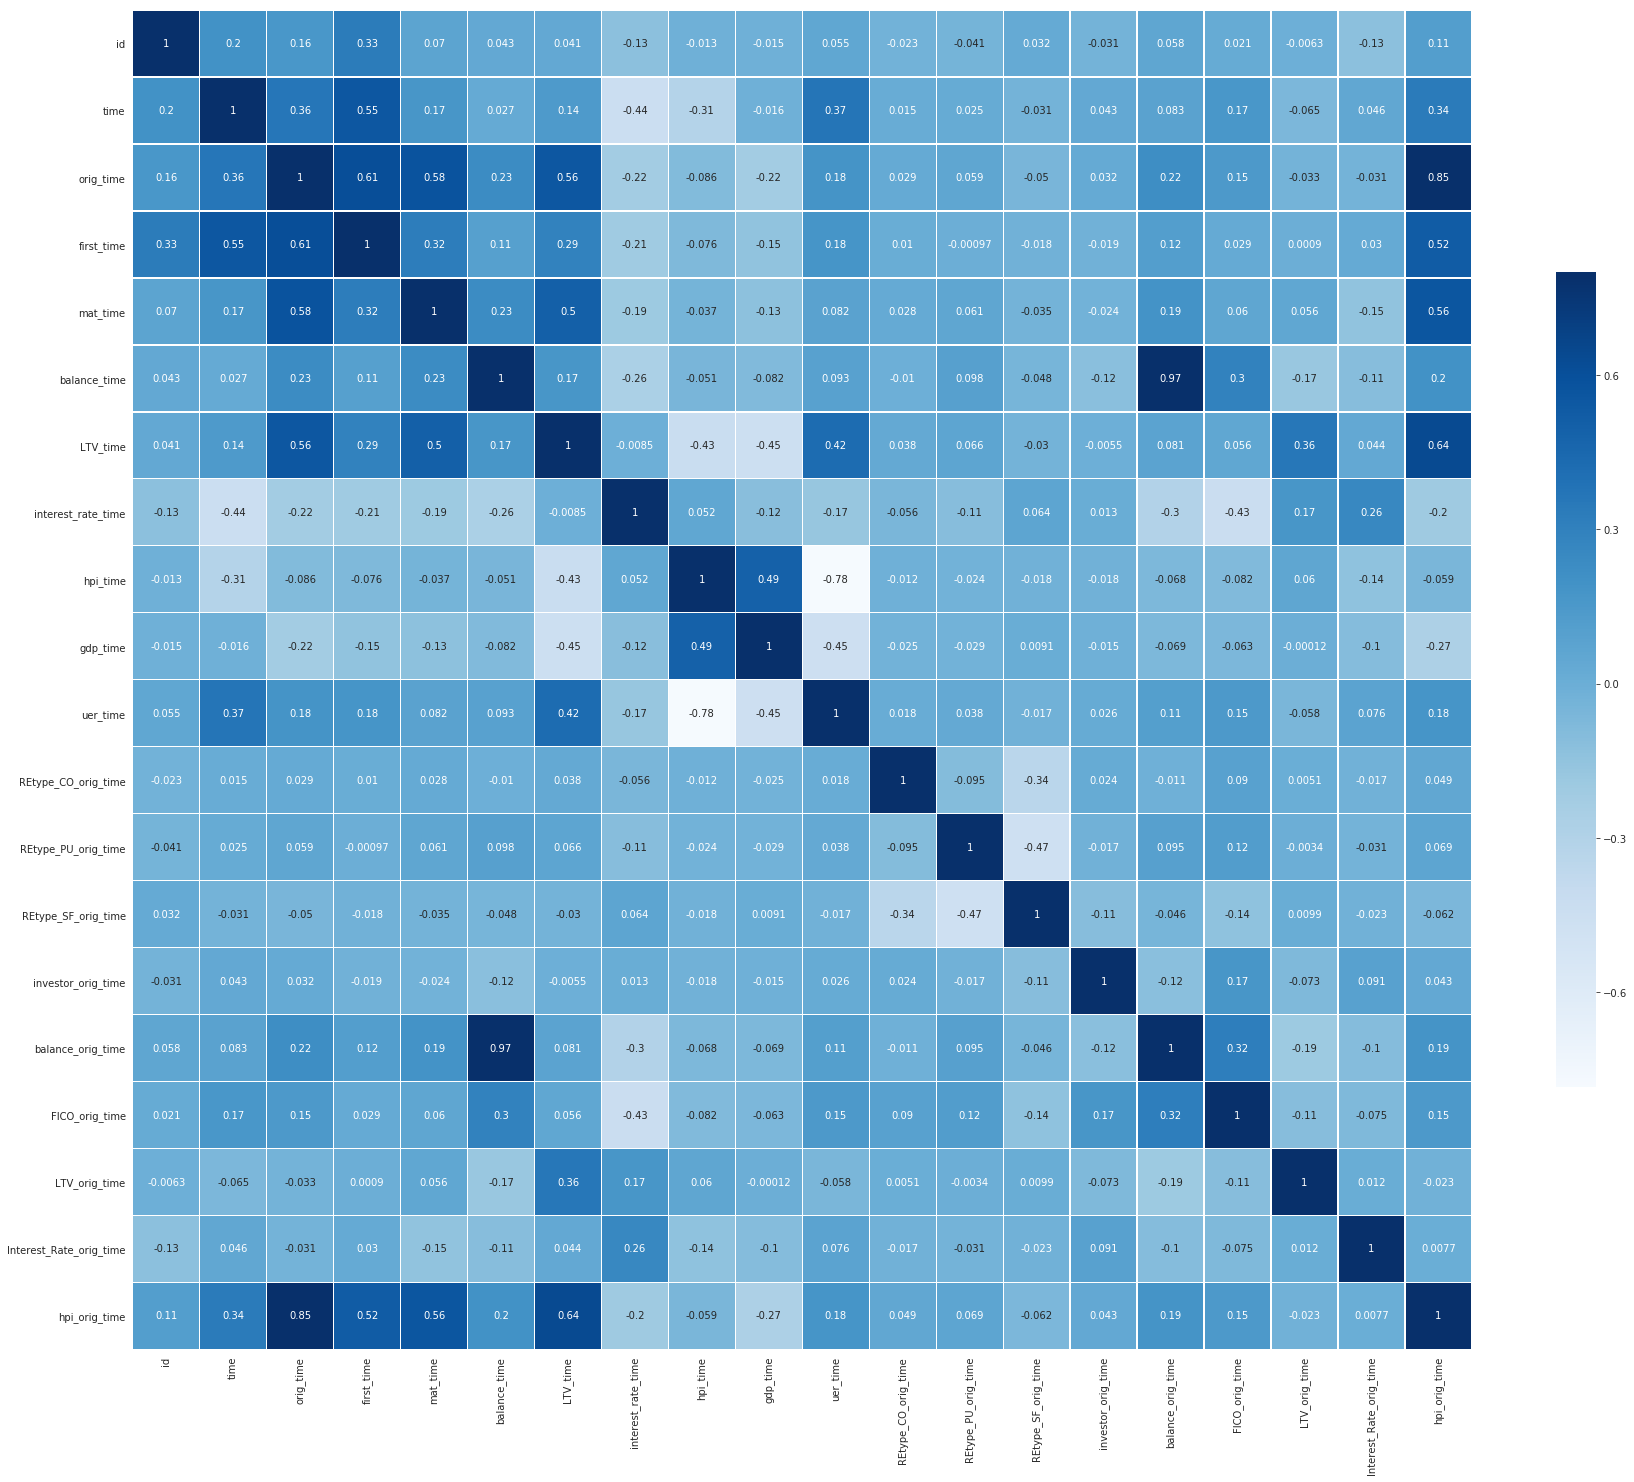

In [24]:
corr_df=X.corr(method="pearson")
a4_dimens=(30,30)
#a4_dimens=(15.7,10.24)
fig , ax=plt.subplots(figsize=a4_dimens)
sns.heatmap(corr_df,cmap="Blues",vmax=0.8,center=0,
            square=True,linewidths=.3,cbar_kws={'shrink':.5},
            annot=True,
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.savefig('sd.jpg')

In [25]:
df = df.drop(['id'], axis = 1)
x1 = df[['orig_time','hpi_orig_time']]
print(x1.shape)
x2 = df[['balance_orig_time','balance_time']]
df = df.drop(['balance_orig_time','balance_time','orig_time','hpi_orig_time'], axis = 1)

(50000, 2)


# Applying PCA

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
x3 = pca.fit_transform(x1)
x4 = pca.fit_transform(x2)
df['pca1'] = x3
df['pca3'] = x4

In [52]:
Y=df['default_time']
X=df.loc[:, df.columns != 'default_time']
#Y.head()


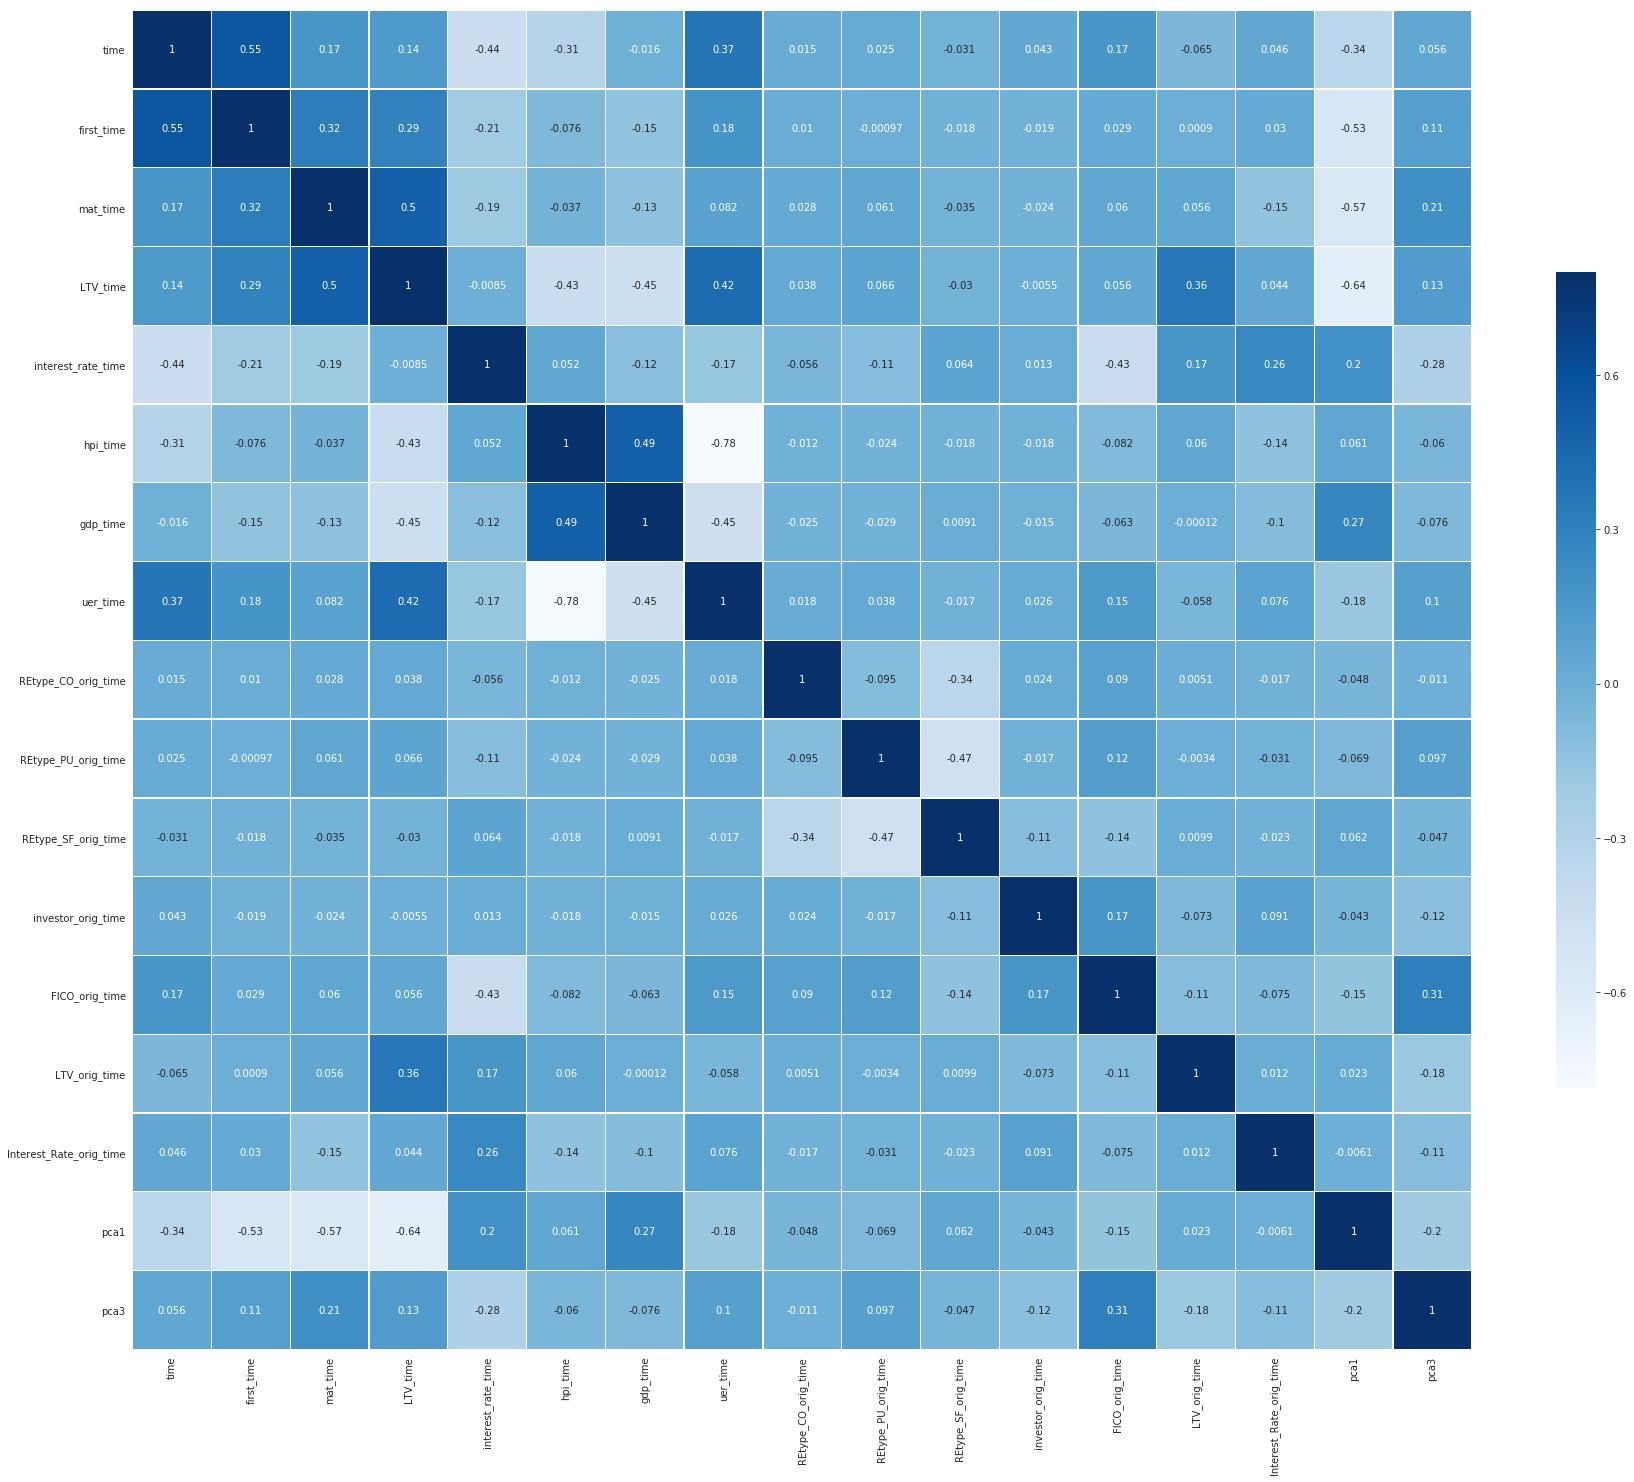

In [28]:
corr_df=X.corr(method="pearson")
a4_dimens=(30,30)
#a4_dimens=(15.7,10.24)
fig , ax=plt.subplots(figsize=a4_dimens)
sns.heatmap(corr_df,cmap="Blues",vmax=0.8,center=0,
            square=True,linewidths=.3,cbar_kws={'shrink':.5},
            annot=True,
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.savefig('sd.jpg')

# Scaling

In [33]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

/home/vivek/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/vivek/.local/lib/python3.5/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/vivek/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


# Upsampling

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
sm = SMOTE(random_state=12, ratio = 1.0)

x_train_r, y_train_r = sm.fit_sample(X_train, y_train)


# Prediction and Modeling

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [40]:
def print_score(clf, X_train, y_train, X_test, y_test):
        print("Train Result:\n")
        print(X_train.shape,y_train.shape)
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))
        print('')
        
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('default_time',axis=1),df['default_time'],test_size=0.25,random_state=101)

In [34]:
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:40].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(15, 12))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
    plt.title('Features (avg over folds)')
    plt.tight_layout()
#     plt.savefig('lgbm_importances.png')

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

clf_rf = LogisticRegression(C = 0.0001,random_state=21)
print(x_train_r.shape)
clf_rf.fit(x_train_r, y_train_r)

(52234, 17)


LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=21,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [31]:
print_score(clf_rf, x_train_r, y_train_r, X_test, y_test)

Train Result:

(52234, 17) (52234,)
accuracy score: 0.7742

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.78      0.78     26117
           1       0.78      0.77      0.77     26117

   micro avg       0.77      0.77      0.77     52234
   macro avg       0.77      0.77      0.77     52234
weighted avg       0.77      0.77      0.77     52234


Confusion Matrix: 
 [[20325  5792]
 [ 6001 20116]]


Test Result:

accuracy score: 0.7729

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.77      0.83      8729
           1       0.60      0.77      0.67      3771

   micro avg       0.77      0.77      0.77     12500
   macro avg       0.74      0.77      0.75     12500
weighted avg       0.80      0.77      0.78     12500


Confusion Matrix: 
 [[6764 1965]
 [ 874 2897]]



# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier


clf_rf = RandomForestClassifier(n_estimators=200,min_samples_leaf=30, random_state=21)
clf_rf.fit(x_train_r, y_train_r)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=21, verbose=0, warm_start=False)

In [34]:
print_score(clf_rf, x_train_r, y_train_r, X_test, y_test)

Train Result:

(52234, 17) (52234,)
accuracy score: 0.8644

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86     26117
           1       0.86      0.87      0.87     26117

   micro avg       0.86      0.86      0.86     52234
   macro avg       0.86      0.86      0.86     52234
weighted avg       0.86      0.86      0.86     52234


Confusion Matrix: 
 [[22300  3817]
 [ 3266 22851]]


Test Result:

accuracy score: 0.8165

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      8729
           1       0.67      0.78      0.72      3771

   micro avg       0.82      0.82      0.82     12500
   macro avg       0.78      0.81      0.79     12500
weighted avg       0.83      0.82      0.82     12500


Confusion Matrix: 
 [[7258 1471]
 [ 823 2948]]



In [35]:
feats = [f for f in df.columns if f not in ['default_time']]
fold_importance_df = pd.DataFrame()
fold_importance_df["feature"] = feats
fold_importance_df["importance"] = clf_rf.feature_importances_

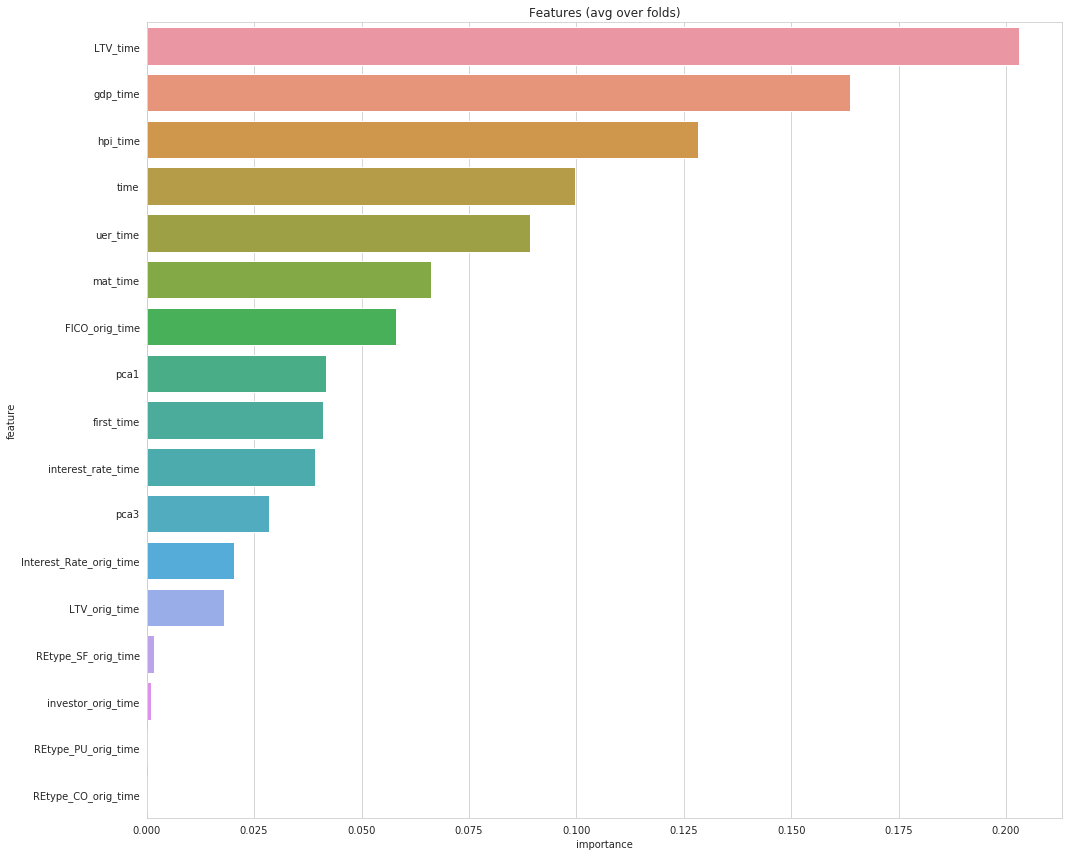

In [36]:
display_importances(fold_importance_df)

# LGBMClassifier

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve
from lightgbm import LGBMClassifier

In [42]:
clf_lgbm = LGBMClassifier(nthread=4,n_estimators=200,learning_rate=0.02,num_leaves=32)
clf_lgbm.fit(x_train_r, y_train_r)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.02, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=200, n_jobs=-1, nthread=4, num_leaves=32,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [45]:
print_score(clf_lgbm, x_train_r, y_train_r, X_test, y_test)

Train Result:

(52234, 17) (52234,)
accuracy score: 0.8579

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.85      0.86     26117
           1       0.85      0.87      0.86     26117

   micro avg       0.86      0.86      0.86     52234
   macro avg       0.86      0.86      0.86     52234
weighted avg       0.86      0.86      0.86     52234


Confusion Matrix: 
 [[22181  3936]
 [ 3486 22631]]


Test Result:

accuracy score: 0.8177

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.84      0.87      8729
           1       0.67      0.77      0.72      3771

   micro avg       0.82      0.82      0.82     12500
   macro avg       0.78      0.80      0.79     12500
weighted avg       0.83      0.82      0.82     12500


Confusion Matrix: 
 [[7323 1406]
 [ 873 2898]]



In [46]:
feats = [f for f in df.columns if f not in ['default_time']]
fold_importance_df = pd.DataFrame()
fold_importance_df["feature"] = feats
fold_importance_df["importance"] = clf_rf.feature_importances_

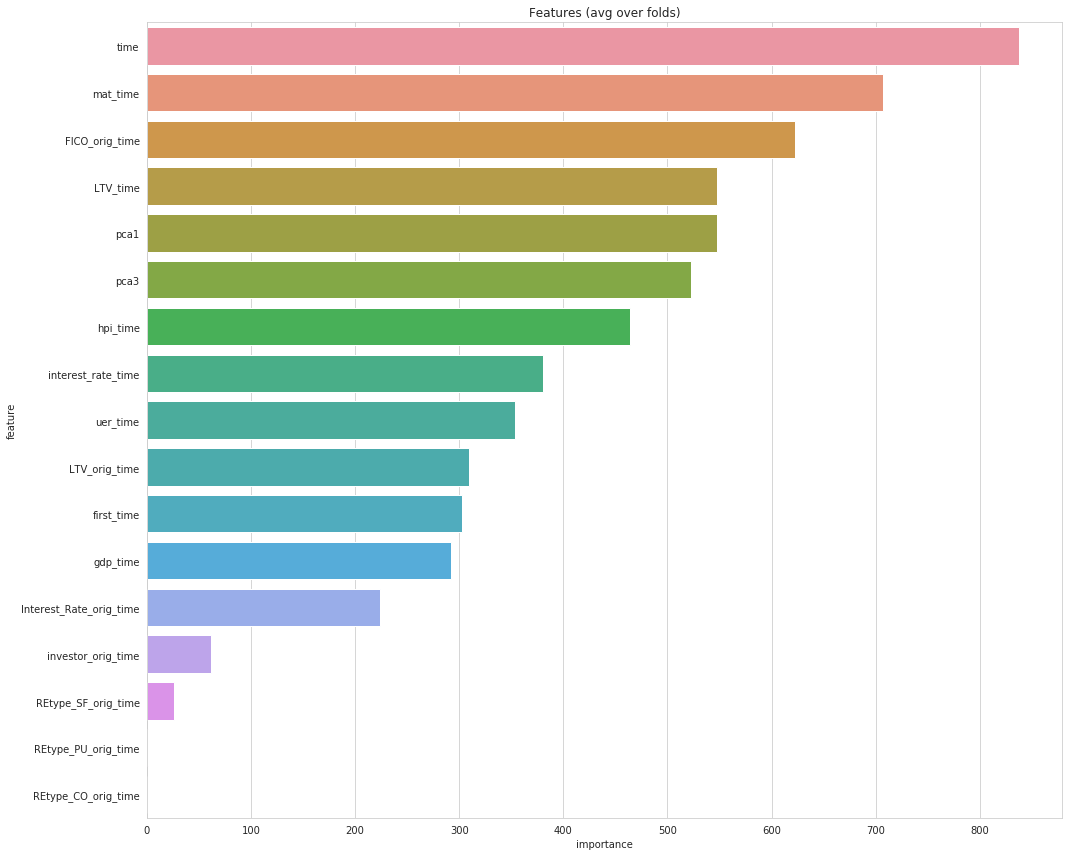

In [47]:
display_importances(fold_importance_df)

# SVM

In [42]:
from sklearn.svm import SVC
clf_rf = SVC(gamma='auto')
clf_rf.fit(x_train_r, y_train_r)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
print_score(clf_rf, x_train_r, y_train_r, X_test, y_test)

Train Result:

(52234, 17) (52234,)
accuracy score: 0.8282

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.81      0.82     26117
           1       0.82      0.85      0.83     26117

   micro avg       0.83      0.83      0.83     52234
   macro avg       0.83      0.83      0.83     52234
weighted avg       0.83      0.83      0.83     52234


Confusion Matrix: 
 [[21138  4979]
 [ 3996 22121]]


Test Result:

accuracy score: 0.8027

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.80      0.85      8729
           1       0.63      0.82      0.71      3771

   micro avg       0.80      0.80      0.80     12500
   macro avg       0.77      0.81      0.78     12500
weighted avg       0.83      0.80      0.81     12500


Confusion Matrix: 
 [[6951 1778]
 [ 688 3083]]



# KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
clf_rf = KNeighborsClassifier(n_neighbors=3)
clf_rf.fit(x_train_r, y_train_r)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [45]:
print_score(clf_rf, x_train_r, y_train_r, X_test, y_test)

Train Result:

(52234, 17) (52234,)
accuracy score: 0.9201

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.86      0.92     26117
           1       0.88      0.98      0.92     26117

   micro avg       0.92      0.92      0.92     52234
   macro avg       0.93      0.92      0.92     52234
weighted avg       0.93      0.92      0.92     52234


Confusion Matrix: 
 [[22483  3634]
 [  538 25579]]


Test Result:

accuracy score: 0.7638

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.77      0.82      8729
           1       0.58      0.76      0.66      3771

   micro avg       0.76      0.76      0.76     12500
   macro avg       0.73      0.76      0.74     12500
weighted avg       0.79      0.76      0.77     12500


Confusion Matrix: 
 [[6685 2044]
 [ 909 2862]]



# Prediction

In [77]:
start_df = pd.read_csv('test.csv', low_memory=False)
start_df = start_df.drop(['payoff_time','status_time'], axis = 1)
df = start_df.copy(deep=True)
df.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_CO_orig_time,REtype_PU_orig_time,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time
0,1,46,-7,25,113,29658.49,25.581586,9.20,155.61,1.175909,...,0,0,1,0,45000,715,69.4,9.20,87.03,0
1,1,47,-7,25,113,29231.67,26.229864,9.20,149.58,1.668182,...,0,0,1,0,45000,715,69.4,9.20,87.03,0
2,1,48,-7,25,113,29087.21,26.658065,9.20,146.45,2.715903,...,0,0,1,0,45000,715,69.4,9.20,87.03,1
3,2,25,18,25,138,105826.38,65.231343,7.68,226.29,2.899137,...,0,0,1,0,107200,558,80.0,7.68,186.91,0
4,2,26,18,25,138,105654.77,65.469851,7.68,225.10,2.151365,...,0,0,1,0,107200,558,80.0,7.68,186.91,0


In [78]:
df = df.drop(['id'], axis = 1)
x1 = df[['orig_time','hpi_orig_time']]
x2 = df[['balance_orig_time','balance_time']]
df = df.drop(['balance_orig_time','balance_time','orig_time','hpi_orig_time'], axis = 1)

In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
x3 = pca.fit_transform(x1)
x4 = pca.fit_transform(x2)
df['pca1'] = x3
df['pca3'] = x4

In [80]:
Y=df['default_time']
X=df.loc[:, df.columns != 'default_time']

In [81]:
X=sc.transform(X)

/home/vivek/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [82]:
preds = clf_lgbm.predict(X)
preds

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0])

In [83]:
np.savetxt('results.csv',preds,delimiter=",")